# EXPLORATORY DATA ANALYSIS

### IMPORTING ALL THE REQUIRED MODULES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the data and storing it in a variable

In [4]:
beer_data =pd.read_csv("C://Users/seema/Downloads/beerreview40_51.csv" )             # encoding = 'ISO-8859-2'

### Understanding the structure of Data

In [3]:
beer_data.head()

,palate,taste,appearance,review,overall,aroma,user_rating,user_info,state,beer_name,user_name
0,2,6,3,2.8|Draft at the source. Clear light amber col...,10,7,2.8,"- Charlotte, North Carolina, USA - NOV 6, 2015",South Dakota,Dempseys Longship Lager,Travlr
1,3,6,3,Draft - Caramel and light toast. Murky brown w...,11,6,2.9,"- Burnaby, British Columbia, CANADA - SEP 24,...",South Dakota,Dempseys Longship Lager,Ferris
2,2,5,2,Tap at the brewpub. Slightly murky dirty amber...,10,5,2.4,"- Plymouth, Minnesota, USA - SEP 16, 2014",South Dakota,Dempseys Longship Lager,BVery
3,3,7,3,"Growler from the source, brought back by my da...",16,7,3.6,"- Rockford, Illinois, USA - NOV 12, 2013",South Dakota,Dempseys Longship Lager,jmagnus87
4,1,2,3,on tap-pours dark amber with an offwhite ring....,3,7,1.6,"- Florida and, New Jersey, USA - FEB 17, 2012",South Dakota,Dempseys Longship Lager,jcwattsrugger


In [5]:
beer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36093 entries, 0 to 36092
Data columns (total 11 columns):
palate         36093 non-null int64
taste          36093 non-null int64
appearance     36093 non-null int64
review         36089 non-null object
overall        36093 non-null int64
aroma          36093 non-null int64
user_rating    36093 non-null float64
user_info      36093 non-null object
state          36093 non-null object
beer_name      36093 non-null object
user_name      36093 non-null object
dtypes: float64(1), int64(5), object(5)
memory usage: 3.0+ MB


In [4]:
beer_data.describe()

,palate,taste,appearance,overall,aroma,user_rating
count,36093.000000,36093.000000,36093.000000,36093.000000,36093.000000,36093.000000
mean,3.864156,7.810767,3.915579,15.915579,7.767129,3.927321
std,0.678328,1.083890,0.661218,1.995019,1.071113,0.432203
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000
25%,3.000000,7.000000,4.000000,15.000000,7.000000,3.700000
50%,4.000000,8.000000,4.000000,16.000000,8.000000,4.000000
75%,4.000000,8.000000,4.000000,17.000000,8.000000,4.200000
max,5.000000,10.000000,5.000000,20.000000,10.000000,5.000000


In [7]:
# Check missing values
na_values = pd.DataFrame(beer_data.isnull().sum().rename('missing_value_count')).reset_index().rename(columns={'index': 'var_name'})
na_values[na_values['missing_value_count'] >= 0]

,var_name,missing_value_count
0,palate,0
1,taste,0
2,appearance,0
3,review,4
4,overall,0
5,aroma,0
6,user_rating,0
7,user_info,0
8,state,0
9,beer_name,0


No. NA values are there except Reviews column


### Making a calculated column.

In [10]:
beer_data["My_var"] = ((beer_data['palate']+ beer_data['taste']+ beer_data['appearance']+ beer_data['aroma'])/3)*2

In [11]:
(len(beer_data) - len(beer_data.query("My_var > overall")))/len(beer_data)*100

67.27897376222536

So, We see that people 67% of the people give more rating than that calculated by the variable. So, The overall rating consists of more factors than the one just present in the data collected. 

In [12]:
beer =beer_data.boxplot

In [13]:
import matplotlib.pyplot as plt
plt.figure();
bp = beer_data.boxplot()

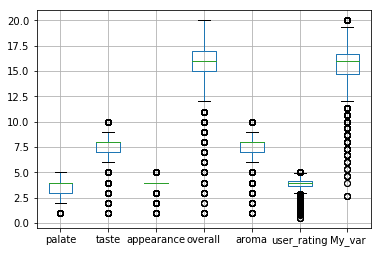

In [14]:
plt.show()

In [16]:
beer_copy = beer_data

In [17]:
beer_copy['overall'] = beer_copy['overall']/4

In [18]:
beer_copy['taste'] = beer_copy['taste']/2

In [19]:
beer_copy['aroma'] = beer_copy['aroma']/2

In [20]:
beer_copy['My_var'] = beer_copy['My_var']/4

In [21]:
##del beer_copy['My var']

In [21]:
beer_copy.head(2)

,palate,taste,appearance,review,overall,aroma,user_rating,user_info,state,beer_name,user_name,My_var
0,2,3.0,3,2.8|Draft at the source. Clear light amber col...,2.50,3.5,2.8,"- Charlotte, North Carolina, USA - NOV 6, 2015",South Dakota,Dempseys Longship Lager,Travlr,3.0
1,3,3.0,3,Draft - Caramel and light toast. Murky brown w...,2.75,3.0,2.9,"- Burnaby, British Columbia, CANADA - SEP 24,...",South Dakota,Dempseys Longship Lager,Ferris,3.0


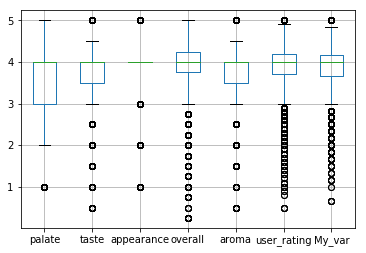

In [22]:
##import matplotlib.pyplot as plt
plt.figure() ;
bn = beer_copy.boxplot()
plt.show()

In [ ]:
## beer_copy.mean()

In [32]:
len(beer_copy.query('user_rating < 2'))

86

In [24]:
beer_copy.median()

palate         4.0
taste          4.0
appearance     4.0
overall        4.0
aroma          4.0
user_rating    4.0
My_var         4.0
dtype: float64

In [25]:
beer_copy.mode()

,palate,taste,appearance,review,overall,aroma,user_rating,user_info,state,beer_name,user_name,My_var
0,4,4.0,4,Pours a golden orange with a small white head....,4.0,4.0,4.0,"- Woodstock, Georgia, USA - SEP 1, 2007",Wisconsin,Alchemist Heady Topper,Travlr,4.0


In [ ]:
## Trying to fuse in all the plots in a single graph for better comparison.

In [35]:
?plt.hist


# Getting a comparative subplot


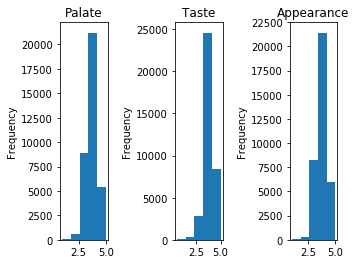

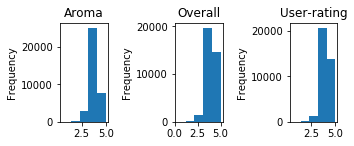

In [41]:
plt.subplot(1,6,1)
plt.hist(beer_copy['palate'],bins=5)
plt.title('Palate')
plt.ylabel('Frequency')

plt.subplot(1,6,3)                                                                                 # 2500
plt.hist(beer_copy['taste'],bins=5)
plt.title('Taste')
plt.ylabel('Frequency')                                                            # overall , aroma , user-rating 

plt.subplot(1,6,5)
plt.hist(beer_copy['appearance'], bins = 5)
plt.title("Appearance")
plt.ylabel('Frequency')

plt.show() 

plt.subplot(2,6,1)
plt.hist(beer_copy['aroma'],bins=5)
plt.title("Aroma")
plt.ylabel('Frequency')

plt.subplot(2,6,3)
plt.hist(beer_copy['overall'],bins=5)
plt.title("Overall")
plt.ylabel("Frequency")

plt.subplot(2,6,5)
plt.hist(beer_copy['user_rating'],bins=5)
plt.title("User-rating")
plt.ylabel("Frequency")

##plt.tight_layout()
plt.show()



In [ ]:
plt.hist(beer_copy['taste'],bins=5)
plt.show()


In [ ]:
plt.hist(beer_copy['appearance'],bins=5)
plt.show()


In [ ]:
plt.hist(beer_copy['overall'],bins=5)
plt.show()

In [ ]:
plt.hist(beer_copy['aroma'],bins=5)
plt.show()

In [ ]:
plt.hist(beer_copy['user_rating'],bins=5)
plt.show()


In [ ]:
plt.hist(beer_copy['My_var'],bins=5)
plt.show()

In [ ]:
beer_copy.head(2)

In [43]:
beer_value = beer_copy[['palate','taste','appearance','overall','aroma','user_rating','My_var']]

In [44]:
beer_value.head()

,palate,taste,appearance,overall,aroma,user_rating,My_var
0,2,3.0,3,2.50,3.5,2.8,3.000000
1,3,3.0,3,2.75,3.0,2.9,3.000000
2,2,2.5,2,2.50,2.5,2.4,2.333333
3,3,3.5,3,4.00,3.5,3.6,3.333333
4,1,1.0,3,0.75,3.5,1.6,2.166667


In [45]:
beer_value.corr()

,palate,taste,appearance,overall,aroma,user_rating,My_var
palate,1.000000,0.489153,0.398879,0.476042,0.354314,0.648187,0.699534
taste,0.489153,1.000000,0.261046,0.737429,0.631705,0.864435,0.855611
appearance,0.398879,0.261046,1.000000,0.252565,0.250665,0.459760,0.560310
overall,0.476042,0.737429,0.252565,1.000000,0.596300,0.907659,0.728296
aroma,0.354314,0.631705,0.250665,0.596300,1.000000,0.775452,0.816688
user_rating,0.648187,0.864435,0.459760,0.907659,0.775452,1.000000,0.948655
My_var,0.699534,0.855611,0.560310,0.728296,0.816688,0.948655,1.000000


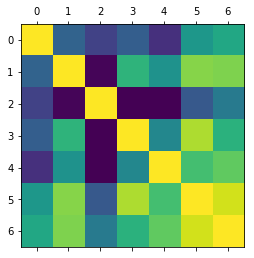

In [46]:
plt.matshow(beer_value.corr())
plt.show()

In [47]:
val = beer_copy['state'].unique()               # 12 states

In [48]:
len(beer_copy['beer_name'].unique())                                 # 296 beers

296

In [49]:
# Do it for one state and then make loop for eleven of them

In [50]:
len(beer_copy['beer_name'].unique())                                 # 296 beers

296

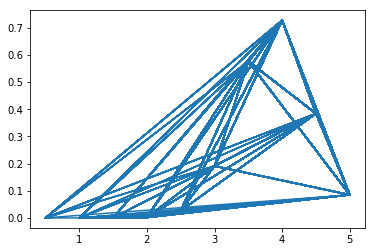

In [55]:
import matplotlib.mlab as mlab
#import math

Aroma = beer_copy['aroma']
plt.plot(Aroma,mlab.normpdf(Aroma, Aroma.mean(), Aroma.std()))
plt.show()
